In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

plt.style.use('seaborn-colorblind')
%matplotlib inline

# грязный хак от надоедливых предупреждений
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("./creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.shape

(284807, 31)

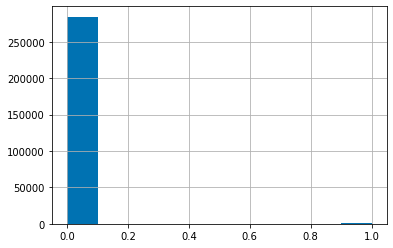

In [4]:
data["Class"].hist()

In [5]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
print('Frauds', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')
print('No Frauds', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')

Frauds 0.17 % of the dataset
No Frauds 99.83 % of the dataset


In [7]:
fraud_df = data.loc[data["Class"] == 1]
fraud_df["Class"].value_counts()

1    492
Name: Class, dtype: int64

In [8]:
non_fraud_df = data.loc[data["Class"] == 0].sample(frac=1, random_state=42)[:492]
non_fraud_df["Class"].value_counts()

0    492
Name: Class, dtype: int64

In [9]:
new_df = pd.concat([fraud_df, non_fraud_df]).sample(frac=1)
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
150661,93853.0,-6.185857,7.102985,-13.030455,8.010823,-7.885237,-3.974550,-12.229608,4.971232,-4.248307,...,2.502772,0.481691,0.480958,0.360319,-0.293354,-0.199193,-0.203917,0.398927,44.90,1
68443,52993.0,-2.131812,0.400819,0.283862,-0.953801,-1.276104,0.269431,-0.980567,1.275068,-1.783504,...,0.144640,-0.184155,-0.328793,-0.905089,0.120992,-0.211991,-0.432603,-0.291180,100.00,0
150654,93834.0,-3.765680,5.890735,-10.202268,10.259036,-5.611448,-3.235376,-10.632683,3.272716,-5.268905,...,2.245606,0.546321,0.381853,0.382025,-0.821036,0.394355,1.412961,0.782407,0.01,1
102735,68338.0,-0.483155,-0.016123,1.979678,-1.079068,-0.107175,0.609598,-0.539064,0.321502,-1.669046,...,0.184585,0.390673,-0.258332,-0.794636,0.071685,-0.090176,0.100444,0.065282,5.57,0
25784,33764.0,-1.196679,-3.650350,-1.231106,2.323713,-1.213752,0.054165,1.871940,-0.410797,-0.074795,...,0.741560,-0.490131,-1.207483,0.162506,0.307061,-0.363174,-0.209341,0.225871,1242.35,0


In [10]:
new_df['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

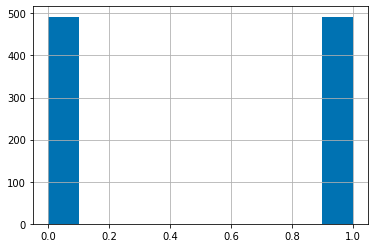

In [11]:
new_df["Class"].hist()

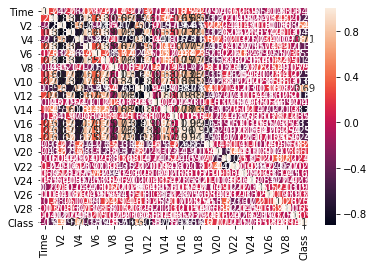

In [12]:
sns.heatmap(new_df.corr(), annot=True);

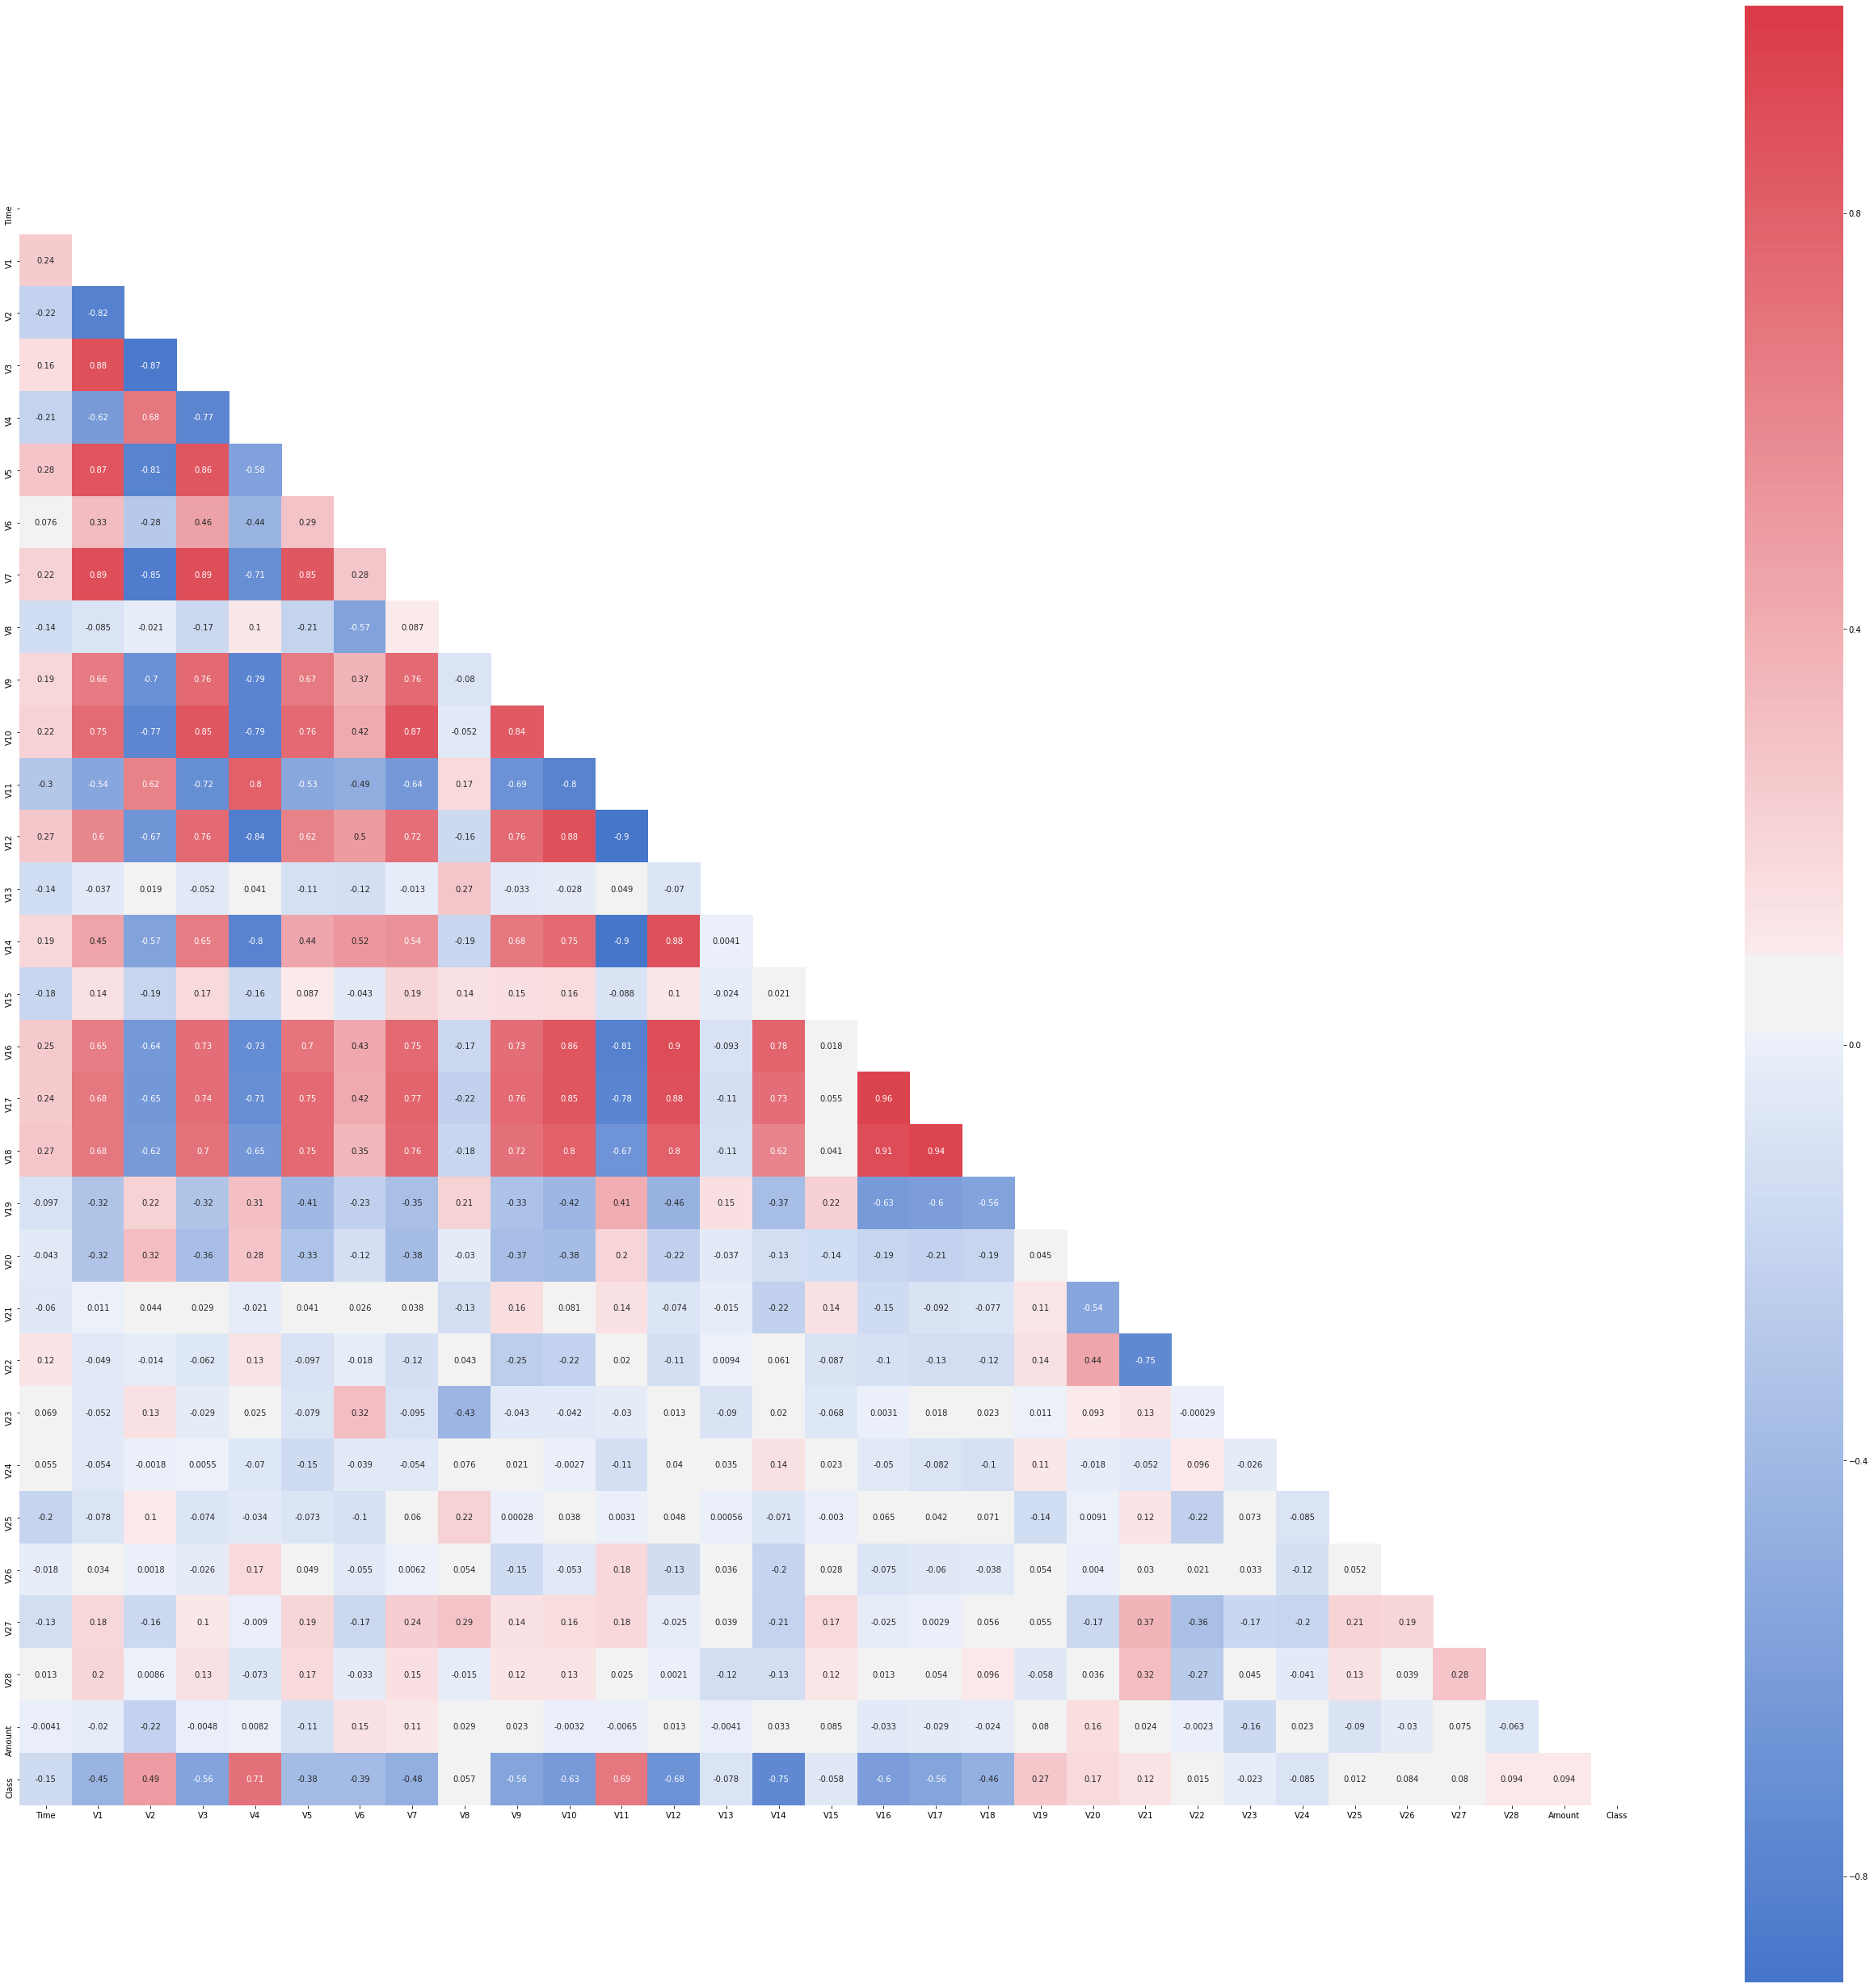

In [13]:
plt.figure(figsize = (45,45))
mask = np.zeros_like(new_df.corr())
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(255, 10, as_cmap = True)
sns.heatmap(\
            new_df.corr(), \
            annot = True, \
            square = True, \
            mask = mask, \
            cmap = cmap \
).get_figure().savefig("correlations_big_picture.png");

In [14]:
correlations = new_df.corr()
used_corr_index = []
interesting_corr_index=[]
for i in correlations:
    for j in correlations.index[correlations[i].abs() > 0.85]:
        # if i != j and i not in used_corr_index and j not in used_corr_index:
        if i != j and [i,j] not in used_corr_index and [j,i] not in used_corr_index:
        #if i != j and [i,j] not in used_corr_index:
            used_corr_index.append([i,j])
            print(correlations[i][correlations.index == j].values[0], "  ", i, "  ", j )
            interesting_corr_index.append([i,j,correlations[i][correlations.index == j].values[0]])


0.8824711431624765    V1    V3
0.8652252812643082    V1    V5
0.8898751704487847    V1    V7
-0.8674096208092377    V2    V3
0.8576417450641554    V3    V5
0.8917568449070807    V3    V7
0.8547911463324078    V3    V10
0.8687159974049934    V7    V10
0.8815187740616377    V10    V12
0.8563729936461343    V10    V16
0.8549192194181976    V10    V17
-0.9019180672409587    V11    V12
-0.8954506371862819    V11    V14
0.8785288361182295    V12    V14
0.9017917093448858    V12    V16
0.8768823598367855    V12    V17
0.9552571925807173    V16    V17
0.9090089642384379    V16    V18
0.9410856297242514    V17    V18


In [15]:
unique_columns_to_drop = []
for j in interesting_corr_index:
    if j[0] not in unique_columns_to_drop:
        unique_columns_to_drop.append(j[0])
print(unique_columns_to_drop, len(unique_columns_to_drop))

['V1', 'V2', 'V3', 'V7', 'V10', 'V11', 'V12', 'V16', 'V17'] 9


In [16]:
dropped_df = new_df.copy()
for j in unique_columns_to_drop:
    dropped_df.drop([j],axis=1,inplace=True)
dropped_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 150661 to 150679
Data columns (total 22 columns):
Time      984 non-null float64
V4        984 non-null float64
V5        984 non-null float64
V6        984 non-null float64
V8        984 non-null float64
V9        984 non-null float64
V13       984 non-null float64
V14       984 non-null float64
V15       984 non-null float64
V18       984 non-null float64
V19       984 non-null float64
V20       984 non-null float64
V21       984 non-null float64
V22       984 non-null float64
V23       984 non-null float64
V24       984 non-null float64
V25       984 non-null float64
V26       984 non-null float64
V27       984 non-null float64
V28       984 non-null float64
Amount    984 non-null float64
Class     984 non-null int64
dtypes: float64(21), int64(1)
memory usage: 176.8 KB


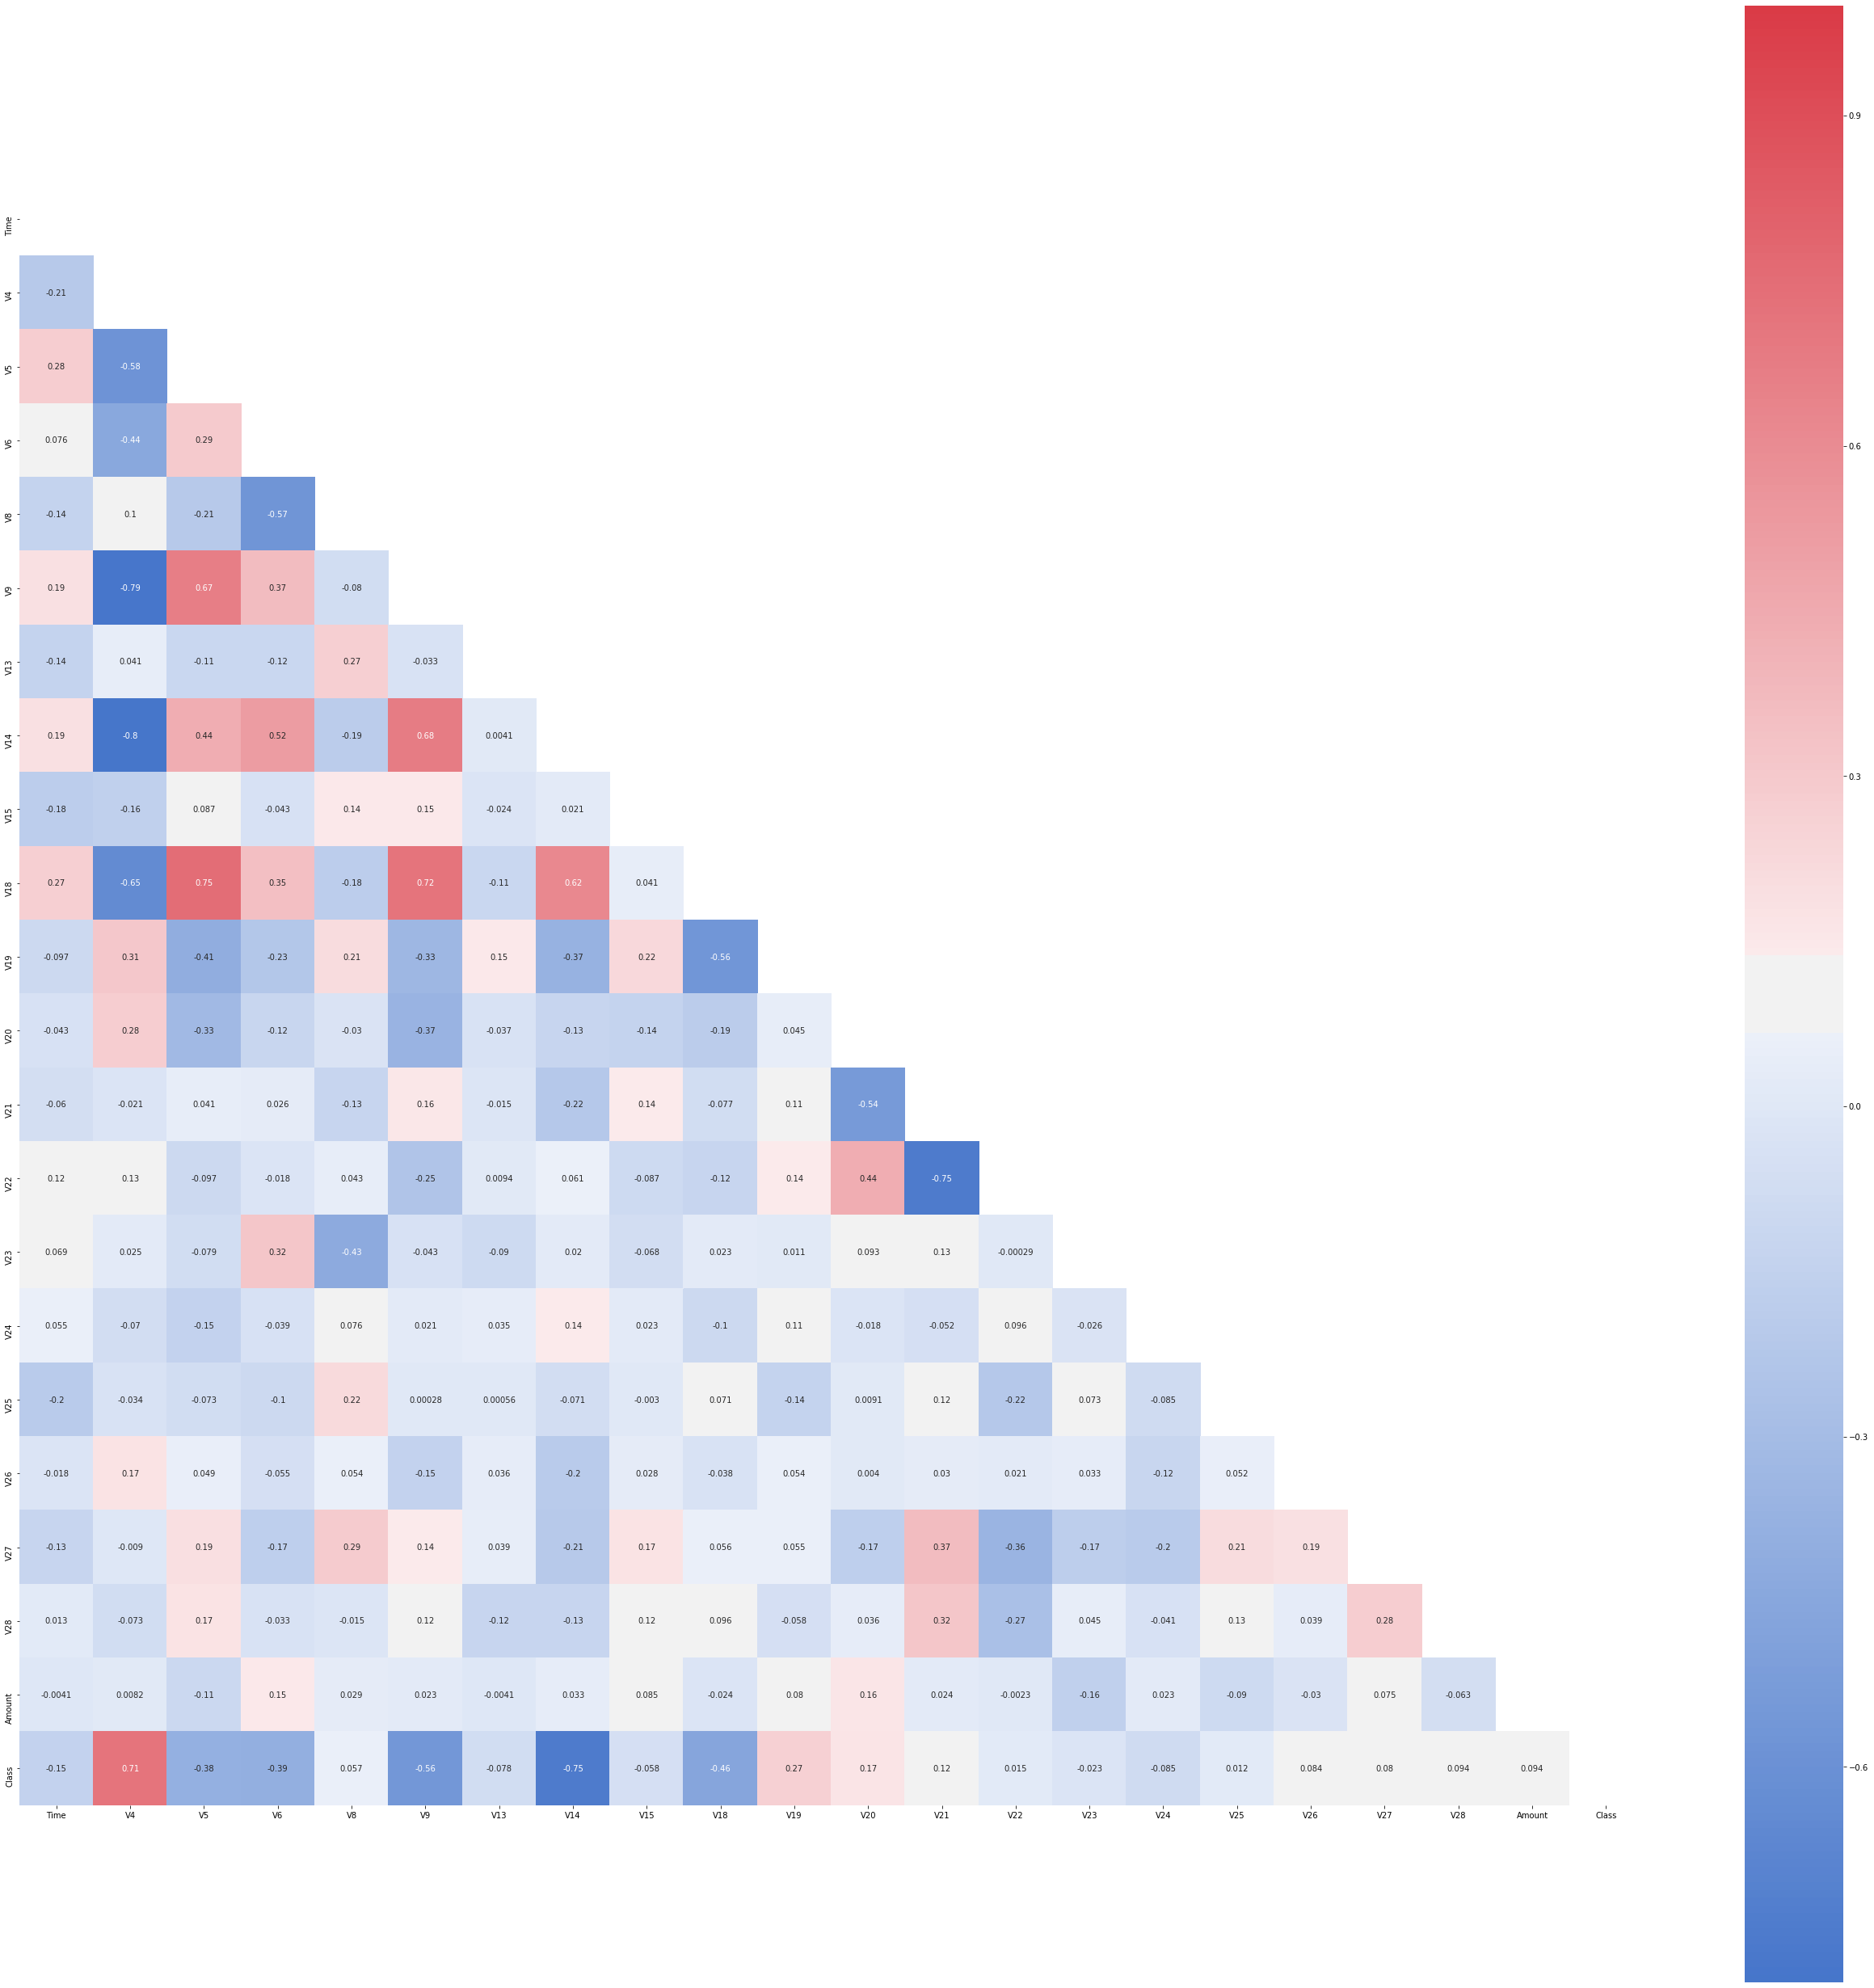

In [17]:
plt.figure(figsize = (45,45))
mask = np.zeros_like(dropped_df.corr())
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(255, 10, as_cmap = True)
sns.heatmap(\
            dropped_df.corr(), \
            annot = True, \
            square = True, \
            mask = mask, \
            cmap = cmap \
).get_figure().savefig("correlations_big_picture.png");

In [18]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 150661 to 150679
Data columns (total 31 columns):
Time      984 non-null float64
V1        984 non-null float64
V2        984 non-null float64
V3        984 non-null float64
V4        984 non-null float64
V5        984 non-null float64
V6        984 non-null float64
V7        984 non-null float64
V8        984 non-null float64
V9        984 non-null float64
V10       984 non-null float64
V11       984 non-null float64
V12       984 non-null float64
V13       984 non-null float64
V14       984 non-null float64
V15       984 non-null float64
V16       984 non-null float64
V17       984 non-null float64
V18       984 non-null float64
V19       984 non-null float64
V20       984 non-null float64
V21       984 non-null float64
V22       984 non-null float64
V23       984 non-null float64
V24       984 non-null float64
V25       984 non-null float64
V26       984 non-null float64
V27       984 non-null float64
V28       984 non-n

In [19]:
dropped_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 150661 to 150679
Data columns (total 22 columns):
Time      984 non-null float64
V4        984 non-null float64
V5        984 non-null float64
V6        984 non-null float64
V8        984 non-null float64
V9        984 non-null float64
V13       984 non-null float64
V14       984 non-null float64
V15       984 non-null float64
V18       984 non-null float64
V19       984 non-null float64
V20       984 non-null float64
V21       984 non-null float64
V22       984 non-null float64
V23       984 non-null float64
V24       984 non-null float64
V25       984 non-null float64
V26       984 non-null float64
V27       984 non-null float64
V28       984 non-null float64
Amount    984 non-null float64
Class     984 non-null int64
dtypes: float64(21), int64(1)
memory usage: 176.8 KB


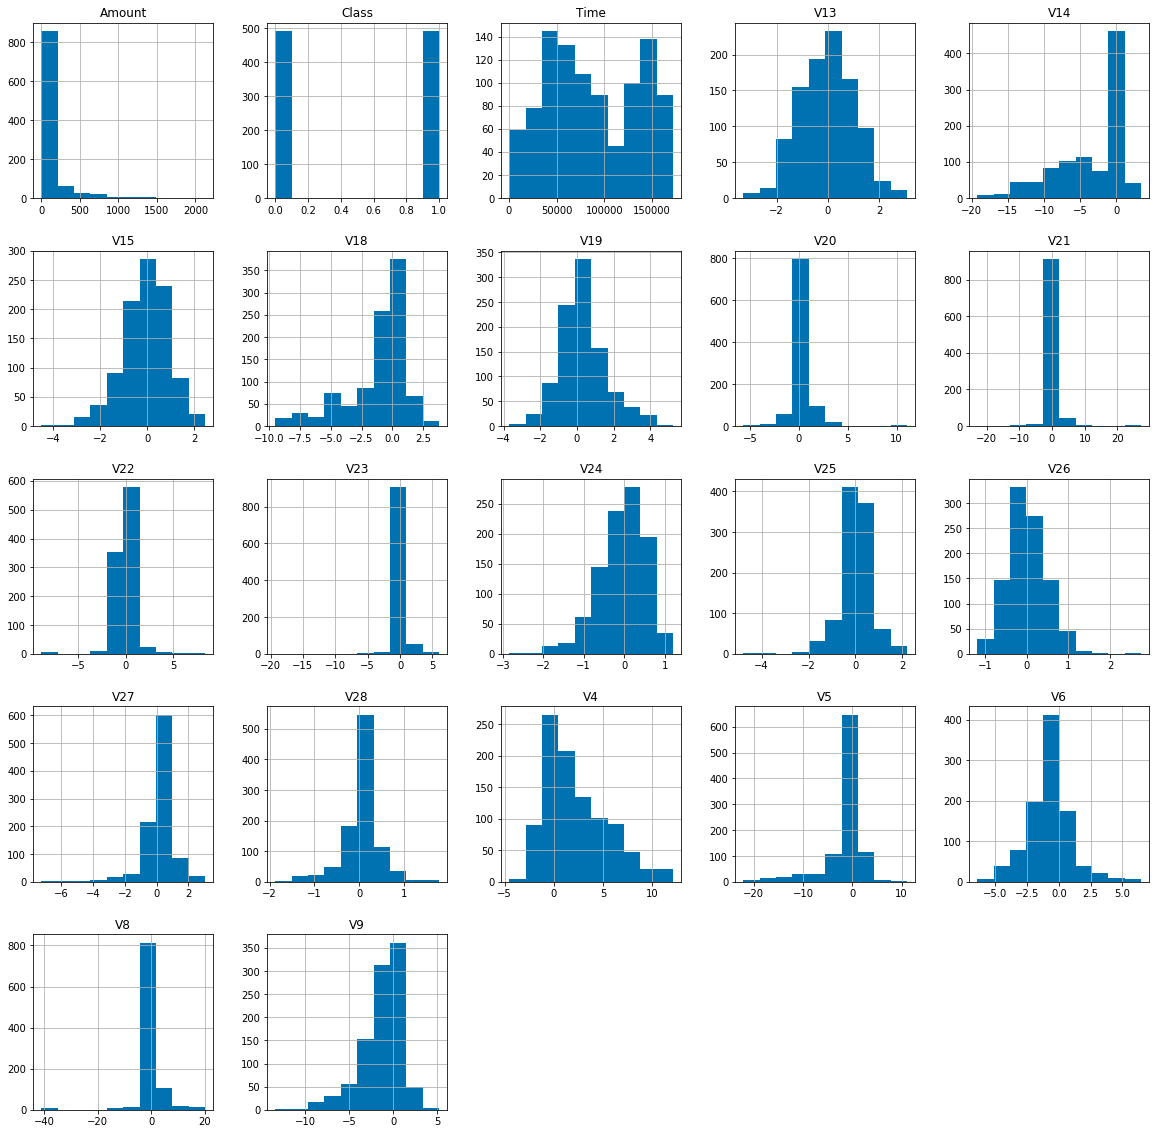

In [20]:
dropped_df.hist(figsize=(20, 20));

In [21]:
dropped_df

,Time,V4,V5,V6,V8,V9,V13,V14,V15,V18,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
150661,93853.0,8.010823,-7.885237,-3.974550,4.971232,-4.248307,0.069577,-14.116156,0.959032,-6.522015,...,2.502772,0.481691,0.480958,0.360319,-0.293354,-0.199193,-0.203917,0.398927,44.90,1
68443,52993.0,-0.953801,-1.276104,0.269431,1.275068,-1.783504,0.472743,0.605644,1.438895,-1.171585,...,0.144640,-0.184155,-0.328793,-0.905089,0.120992,-0.211991,-0.432603,-0.291180,100.00,0
150654,93834.0,10.259036,-5.611448,-3.235376,3.272716,-5.268905,-0.232822,-15.021657,0.141186,-7.051651,...,2.245606,0.546321,0.381853,0.382025,-0.821036,0.394355,1.412961,0.782407,0.01,1
102735,68338.0,-1.079068,-0.107175,0.609598,0.321502,-1.669046,0.573430,-0.219430,0.969791,-0.680968,...,0.184585,0.390673,-0.258332,-0.794636,0.071685,-0.090176,0.100444,0.065282,5.57,0
25784,33764.0,2.323713,-1.213752,0.054165,-0.410797,-0.074795,-0.067141,0.585806,0.412702,-0.616598,...,0.741560,-0.490131,-1.207483,0.162506,0.307061,-0.363174,-0.209341,0.225871,1242.35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151009,94362.0,8.904157,-17.892600,-1.227904,-11.438920,-9.462573,-0.703796,-3.926207,-2.400246,-5.501051,...,-8.755698,3.460893,0.896538,0.254836,-0.738097,-0.966564,-7.263482,-1.324884,1.00,1
42009,40919.0,5.340242,-2.666775,-0.092782,-0.280133,-2.821895,-1.163312,-8.225569,0.825002,-4.568859,...,2.417495,-0.097712,0.382155,-0.154757,-0.403956,0.277895,0.830062,0.218690,112.33,1
105178,69394.0,2.012226,0.622800,-1.152923,0.037372,0.034486,-1.757137,-4.461051,-0.402884,2.284927,...,-0.367136,-0.891627,-0.160578,-0.108326,0.668374,-0.352393,0.071993,0.113684,1.00,1
95640,65405.0,-1.783053,-1.752650,0.522665,-0.430282,1.762763,-1.064998,-0.222974,2.013239,1.500888,...,0.119397,0.968116,-0.352839,0.049816,0.329348,-0.412496,-0.153488,-0.443773,281.34,0


In [22]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

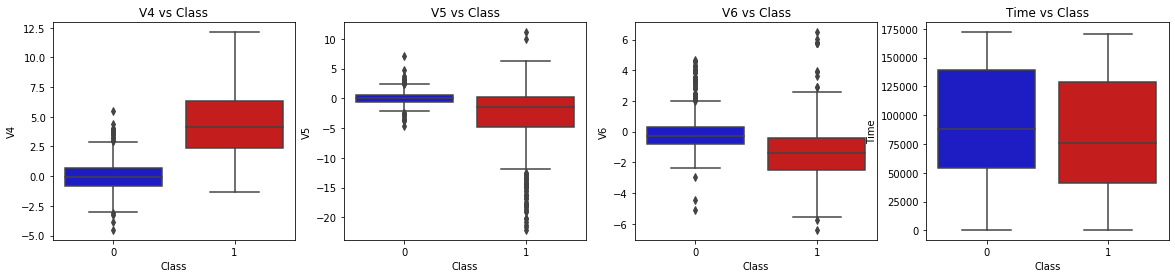

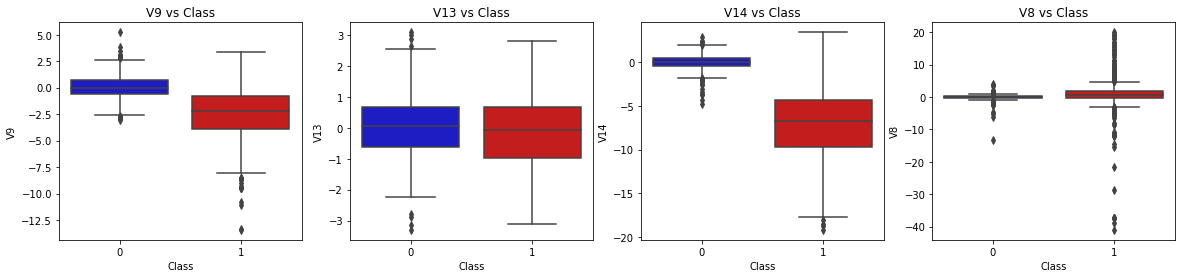

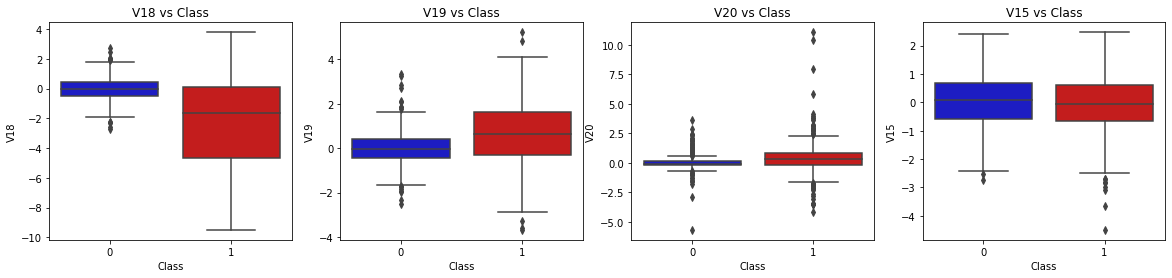

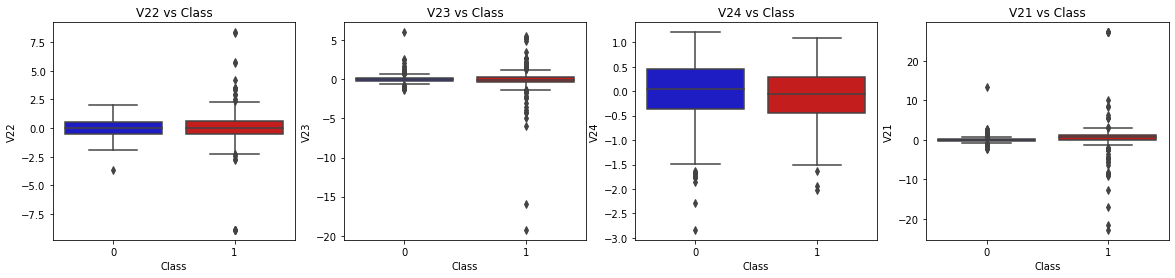

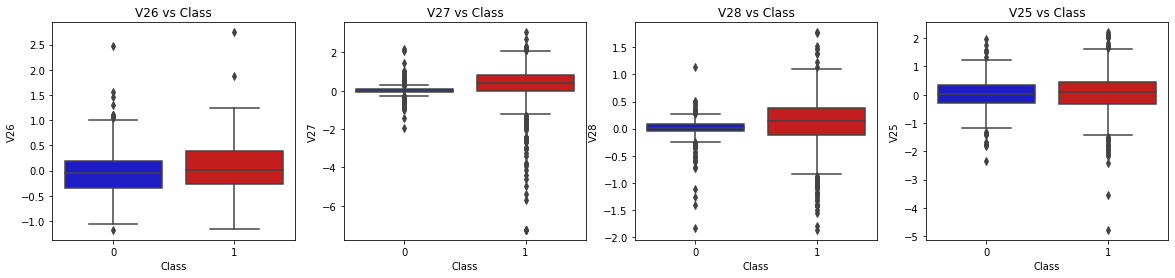

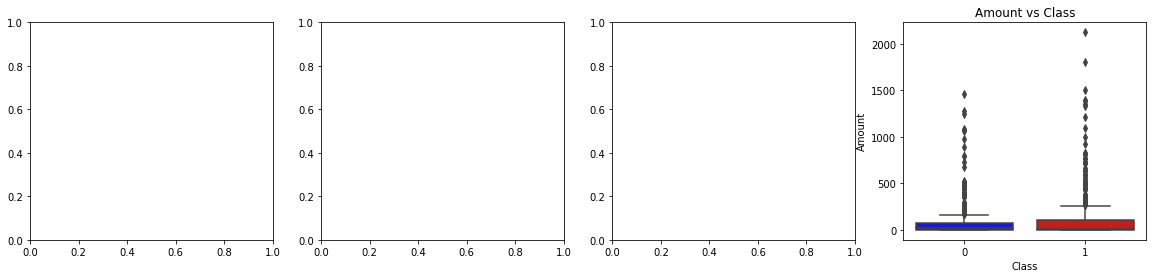

In [23]:
# посмотрим на boxplot каждого признака vs target'a

target = "Class"
graphs_per_row = 4
data = dropped_df
colors = ["#0101DF", "#DF0101", "#FACE8D"]

index = graphs_per_row - 1 # нужно чтобы f,axes сработали при первом прохождении цикла
for j in data.drop(target, axis=1).columns.values:
    if ((index % graphs_per_row) == (graphs_per_row - 1)):
        f, axes = plt.subplots(ncols=graphs_per_row, figsize=(20,4))

    sns.boxplot(x=target, y=j, data=data, palette=colors, ax=axes[index % graphs_per_row])
    axes[index % graphs_per_row].set_title(j + " vs " + target)
    index += 1

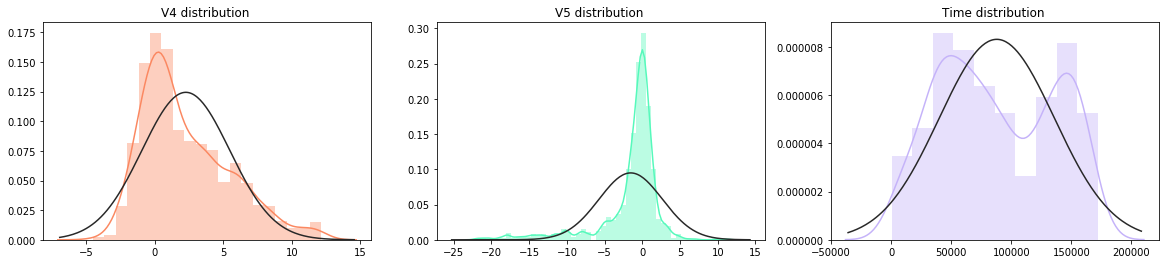

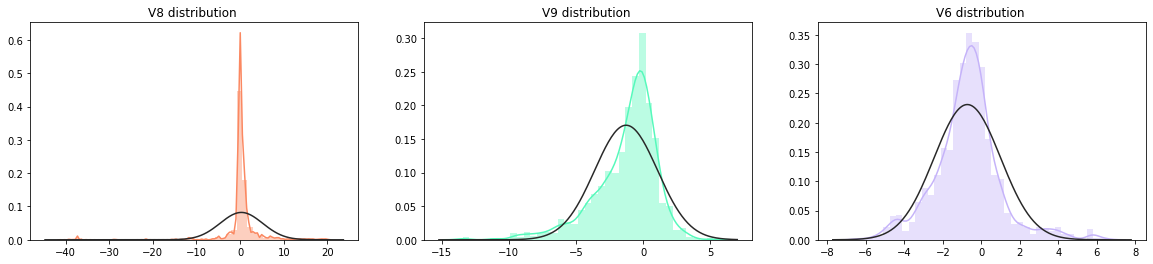

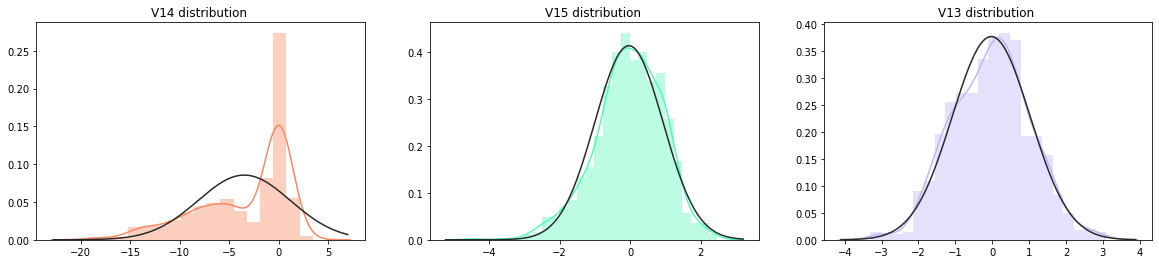

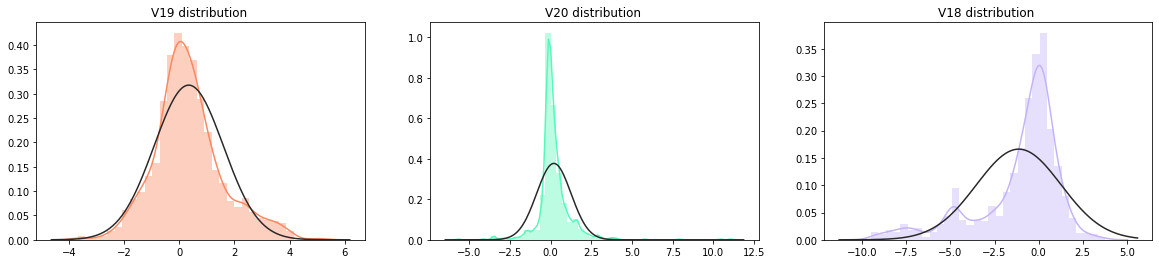

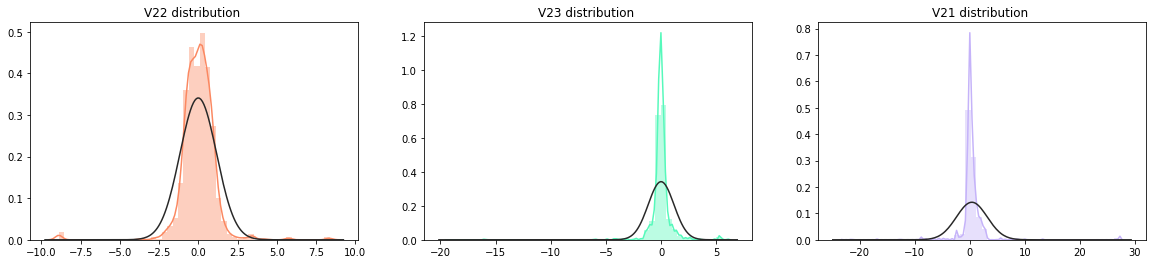

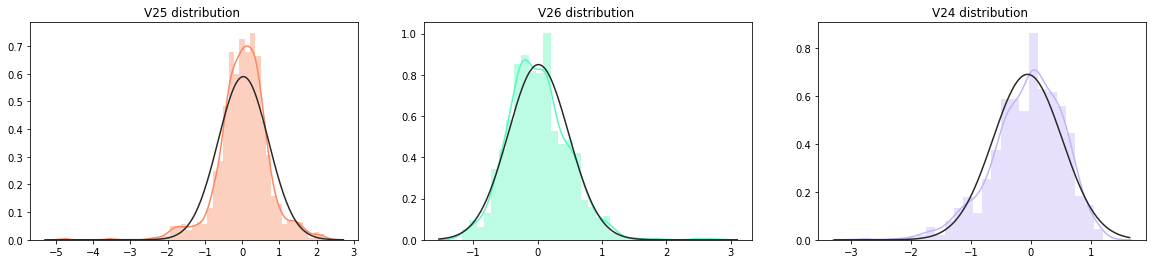

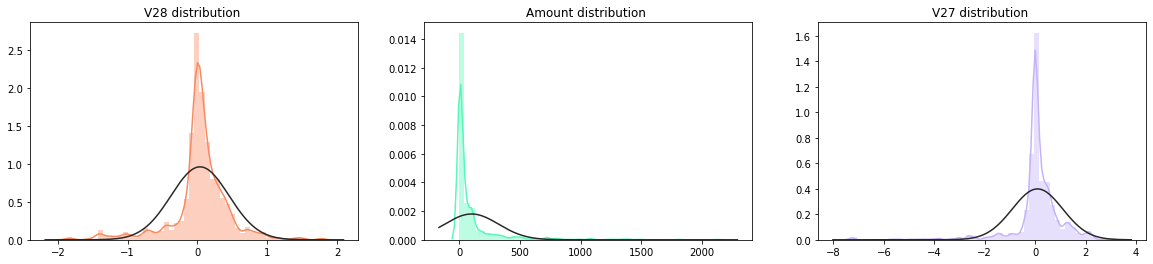

In [24]:
# посмотрим на распределение каждого признака кроме target'a:
from scipy.stats import norm

target = "Class"
graphs_per_row = 3
data = dropped_df
colors = ["#FB8861", "#56F9BB", "#C5B3F9","#FACE8D"] # 

index = graphs_per_row - 1 # нужно чтобы f,axes сработали при первом прохождении цикла
for j in data.drop(target, axis=1).columns.values:
    if ((index % graphs_per_row) == (graphs_per_row - 1)):
        f, axes = plt.subplots(ncols=graphs_per_row, figsize=(20,4))

    sns.distplot(data[j].values, ax=axes[index % graphs_per_row], fit=norm, color=colors[index % graphs_per_row])
    axes[index % graphs_per_row].set_title(j + " distribution ")
    index += 1


In [25]:
# выбросим выбросы
# варианты: 
# - границы в абсолютных значениях
# - интерквартильное расстояние (IQR)
# - cреднее-среднеквадратичное отклонение 
# - Медианы абсолютного отклонения (MAD)
# сегодня мне нравится интерквартильное расстояние, хотя на практике стоит перебрать все варианты.

target = "Class"
data = dropped_df

def outlier_detect_IQR(data,col,threshold=3):    
    IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
    Lower_fence = data[col].quantile(0.25) - (IQR * threshold)
    Upper_fence = data[col].quantile(0.75) + (IQR * threshold)
    para = (Upper_fence, Lower_fence)
    tmp = pd.concat([data[col]>Upper_fence,data[col]<Lower_fence],axis=1)
    outlier_index = tmp.any(axis=1)
    #print('Количество выбросов в данных:', outlier_index.value_counts()[1])
    # везде outlier_index.value_counts()[1] -> outlier_index.sum()
    print('Количество выбросов в данных за 3iqr:', outlier_index.sum())
    print("Доля выбросов: ", (outlier_index.sum()/len(data) * 100).round(2), "%") # и тут на ноль больше не делим
    return outlier_index, para

print(data.drop(target, axis=1).columns.values)

['Time' 'V4' 'V5' 'V6' 'V8' 'V9' 'V13' 'V14' 'V15' 'V18' 'V19' 'V20' 'V21'
 'V22' 'V23' 'V24' 'V25' 'V26' 'V27' 'V28' 'Amount']


In [26]:
# разобраться с автоматическим отсечением выбросов

data = dropped_df
outliers = pd.Series()
for j in data.drop(target, axis=1).columns.values:
    print(j+":")
    index,para = outlier_detect_IQR(data=data, col=j, threshold=3)
    outliers = outliers | index
    print('Верхняя граница:', para[0],'\nНижняя граница:',para[1])
    print()
    

Time:
Количество выбросов в данных за 3iqr: 0
Доля выбросов:  0.0 %
Верхняя граница: 400329.0 
Нижняя граница: -219872.75

V4:
Количество выбросов в данных за 3iqr: 0
Доля выбросов:  0.0 %
Верхняя граница: 17.23299927720021 
Нижняя граница: -13.170729564373579

V5:
Количество выбросов в данных за 3iqr: 77
Доля выбросов:  7.83 %
Верхняя граница: 7.29373782001055 
Нижняя граница: -8.576554346602999

V6:
Количество выбросов в данных за 3iqr: 8
Доля выбросов:  0.81 %
Верхняя граница: 5.0932650131514166 
Нижняя граница: -6.619666953313887

V8:
Количество выбросов в данных за 3iqr: 103
Доля выбросов:  10.47 %
Верхняя граница: 4.15822171626475 
Нижняя граница: -3.519105560125162

V9:
Количество выбросов в данных за 3iqr: 4
Доля выбросов:  0.41 %
Верхняя граница: 7.8318607824145605 
Нижняя граница: -9.993249949960493

V13:
Количество выбросов в данных за 3iqr: 0
Доля выбросов:  0.0 %
Верхняя граница: 5.056382457554241 
Нижняя граница: -5.160585876206475

V14:
Количество выбросов в данных за 3i

In [27]:
index.shape

(984,)

In [28]:
index.sum()

67

In [29]:
index[index].index

Int64Index([ 25784, 151196, 199896, 215984,   6971,  49363, 188962, 145800,
            174921,  46918, 127274,  85913,  42741,   7379, 107637,  81609,
            226814,  41777, 146790, 149874, 275992, 188093,  42852,  84543,
            232091, 233258,  94218, 141259,    623, 215132,  89190, 226990,
             57838, 176049,  95597,  23422, 157560, 197586, 212644, 249239,
             94316, 103430,  48498, 108708,  77387, 273390, 157918,  26371,
            241578, 195383, 251261, 141260, 203328, 191074, 223840, 100623,
             39183,  68067,  16863,  99789,  10630, 249167,  10690,  99506,
            204527,  44001,  76163],
           dtype='int64')

In [30]:
dropped_df.index

Int64Index([150661,  68443, 150654, 102735,  25784,  27362,  28747, 156174,
            237521,  17453,
            ...
            163620, 144104, 150665, 122614,   6446, 151009,  42009, 105178,
             95640, 150679],
           dtype='int64', length=984)

In [31]:
dropped_df.shape
dropped_df.drop(index[index].index, inplace = True)

In [32]:
dropped_df.shape

(917, 22)

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    dropped_df.drop(["Class"], axis=1), 
    dropped_df["Class"], 
    test_size=0.20, # 20% на тесты 
    random_state=42, # любой id для воспроизводимой рандомности в рамках одного окружения
    stratify=dropped_df["Class"] # бьем чтобы в тест попало пропорциональное число с True/False
)


In [34]:
# стандартизируем
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
# Classifier Libraries

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

from sklearn.model_selection import cross_val_score

In [36]:
# Лениво перебирать все методы, пройдемся циклом без тонкой настройки
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

# for each classifier lets cross-validate with 5 chunks and print mean of training score
for key, classifier in classifiers.items():
    classifier.fit(X_train_scaled, y_train)
    training_score = cross_val_score(classifier, X_train_scaled, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "  has ", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression   has  94.0 % accuracy score
Classifiers:  KNeighborsClassifier   has  89.0 % accuracy score
Classifiers:  SVC   has  93.0 % accuracy score
Classifiers:  DecisionTreeClassifier   has  89.0 % accuracy score


In [37]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
svc = SVC(probability=True)
svc.fit(X_train_scaled, y_train)
print(svc)
y_train_pred = svc.predict_proba(X_train_scaled)
y_test_pred = svc.predict_proba(X_test_scaled)
train_score = roc_auc_score(y_train, 1 - y_train_pred[:, 0])
test_score = roc_auc_score(y_test, 1 - y_test_pred[:, 0])
print(train_score)
print(test_score)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
0.9880026809651475
0.9879432624113476


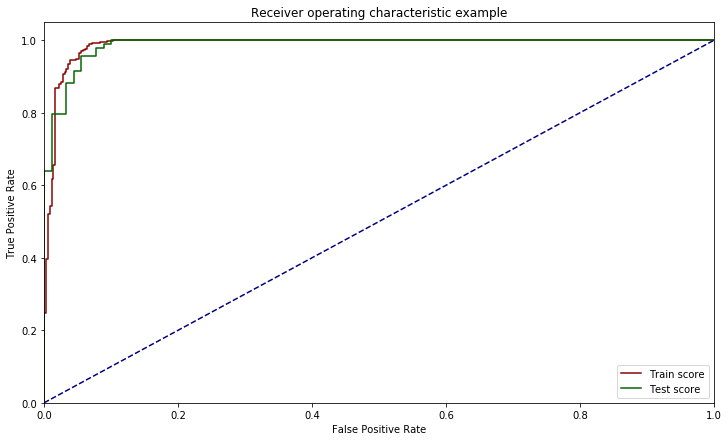

In [38]:
plt.figure(figsize=(12, 7))
# train
tpr, fpr, _ = roc_curve(y_train, y_train_pred[:, 0])
auc_ = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkred', label='ROC curve (area = %0.2f)' % auc_)

#test
tpr, fpr, _ = roc_curve(y_test, y_test_pred[:, 0])
auc_ = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkgreen', label='ROC curve (area = %0.2f)' % auc_)

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(('Train score', 'Test score'), loc="lower right")
plt.show()

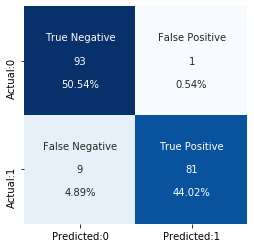

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, svc.predict_proba(X_test_scaled)[:, 1]>0.8)

conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])

group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in conf_matrix.values.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in conf_matrix.values.flatten()/np.sum(conf_matrix.values)]
labels = [f"{v1}\n\n{v2}\n\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize = (4,4))
cmap = "Blues"
sns.heatmap(conf_matrix, annot=labels,fmt='',cmap=cmap, cbar=False);

In [40]:
# Пройдемся-ка гридом, попробуем подобрать гиперпараметры для SVM Classifier'а:
from sklearn.model_selection import GridSearchCV

# Support Vector Classifier
svc_params = {'C': [0.5, 0.6, 0.7, 0.8, 0.9, 1], 'kernel': ['linear', 'poly', 'sigmoid', 'rbf']}
grid_svc = GridSearchCV(SVC(probability=True), svc_params)
grid_svc.fit(X_train_scaled, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_
print(svc)

SVC(C=0.6, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


In [41]:
y_train_pred = svc.predict_proba(X_train_scaled)
y_test_pred = svc.predict_proba(X_test_scaled)
train_score = roc_auc_score(y_train, 1 - y_train_pred[:, 0])
test_score = roc_auc_score(y_test, 1 - y_test_pred[:, 0])
print(train_score)
print(test_score)

0.9846440274054215
0.9715130023640662


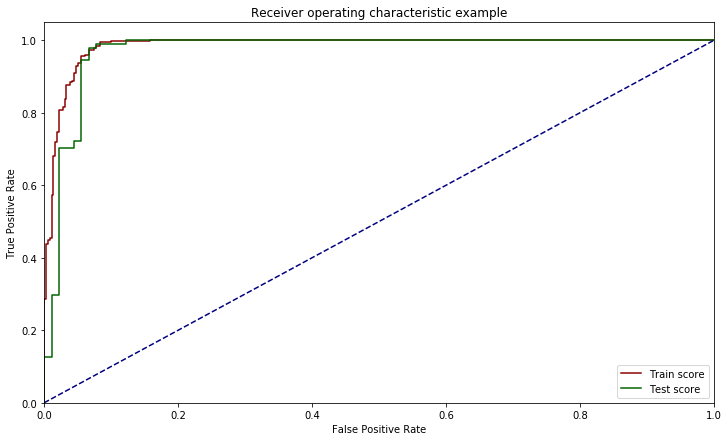

In [42]:
plt.figure(figsize=(12, 7))
# train
tpr, fpr, _ = roc_curve(y_train, y_train_pred[:, 0])
auc_ = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkred', label='ROC curve (area = %0.2f)' % auc_)

# test
tpr, fpr, _ = roc_curve(y_test, y_test_pred[:, 0])
auc_ = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkgreen', label='ROC curve (area = %0.2f)' % auc_)

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(('Train score', 'Test score'), loc="lower right")
plt.show()

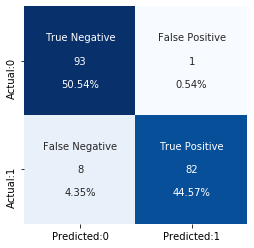

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, svc.predict_proba(X_test_scaled)[:, 1]>0.8)

conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])


group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in conf_matrix.values.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in conf_matrix.values.flatten()/np.sum(conf_matrix.values)]
labels = [f"{v1}\n\n{v2}\n\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize = (4,4))
cmap = "Blues"
sns.heatmap(conf_matrix, annot=labels,fmt='',cmap=cmap, cbar=False);